# Fundamentals of Data Science 
<div>
Dataset Description 
The dataset provided, Bank_Churn.csv, includes 10,000 samples with the following columns: 


• CustomerId: A unique identifier for each customer 

• Surname: The customer's last name. 

• CreditScore: A numerical value representing the customer's credit score. 

• Geography: The country where the customer resides. 

• Gender: The customer's gender. 

• Age: The customer's age. 

• Tenure: The number of years the customer has been with the bank.

• Balance: The customer's account balance. 

• NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card). 

• HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no). 

• IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no). 

• EstimatedSalary: The estimated salary of the customer. 

• Exited: Whether the customer has churned (1 = yes, 0 = no). 

</div>


## Imports 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow

## Part 0: Initial Data Exploration

### Task 1: Load and Preview the Data

In [59]:

df = pd.read_csv(r'D:\uni\Dats Sience\CA\CA1\FDS_CA1_Merati810801077_mahdian810801079/Bank_Churn.csv' )
print(df.head())
print(df.tail())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0  
      CustomerId    Surname  CreditScore Geography

### Task 2: Dataset Summary

In [60]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


### Task 3: Descriptive Overview

In [61]:
print(df.describe())

         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       NumOfProducts    HasCrCard  IsActiveMember  EstimatedSalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   

### Task 4: Unique Values

In [62]:
print(df.nunique())
print(df['Exited'].unique())
print(df['Geography'].unique())
print(df['Gender'].unique())

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
[1 0]
['France' 'Spain' 'Germany']
['Female' 'Male']


### Task 5: Data Distribution

In [63]:
print(df['Gender'].value_counts())
print(df['Geography'].value_counts())
print(df['Exited'].value_counts())

Gender
Male      5457
Female    4543
Name: count, dtype: int64
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Exited
0    7963
1    2037
Name: count, dtype: int64


## Part 1: Fundamental Probability Concepts and Descriptive Statistics

### Task 1: Descriptive Statistics

mean for balanced :76485.889288
mean for Age :38.9218
mean for CreditScore :650.5288
mean for EstimatedSalary :100090.239881
median for balanced :97198.54000000001
median for Age :37.0
median for CriditScore :652.0
median for EstimatedSalary :100193.915
mode for balanced :0    0.0
Name: Balance, dtype: float64
mode for Age :0    37
Name: Age, dtype: int64
mode for CreditScore :0    850
Name: CreditScore, dtype: int64
mode for EstimatedSalary :0    24924.92
Name: EstimatedSalary, dtype: float64
variance for balanced :3893436175.990742
variance for Age :109.99408416841683
variance for CriditScore :9341.860156575658
variance for EstimatedSalary :3307456784.134512
standard deviation for balanced :62397.405202385955
standard deviation for Age :10.487806451704609
standard deviation for criditScore : 96.65329873613035
standard deviation for estimatedsalary :57510.49281769816


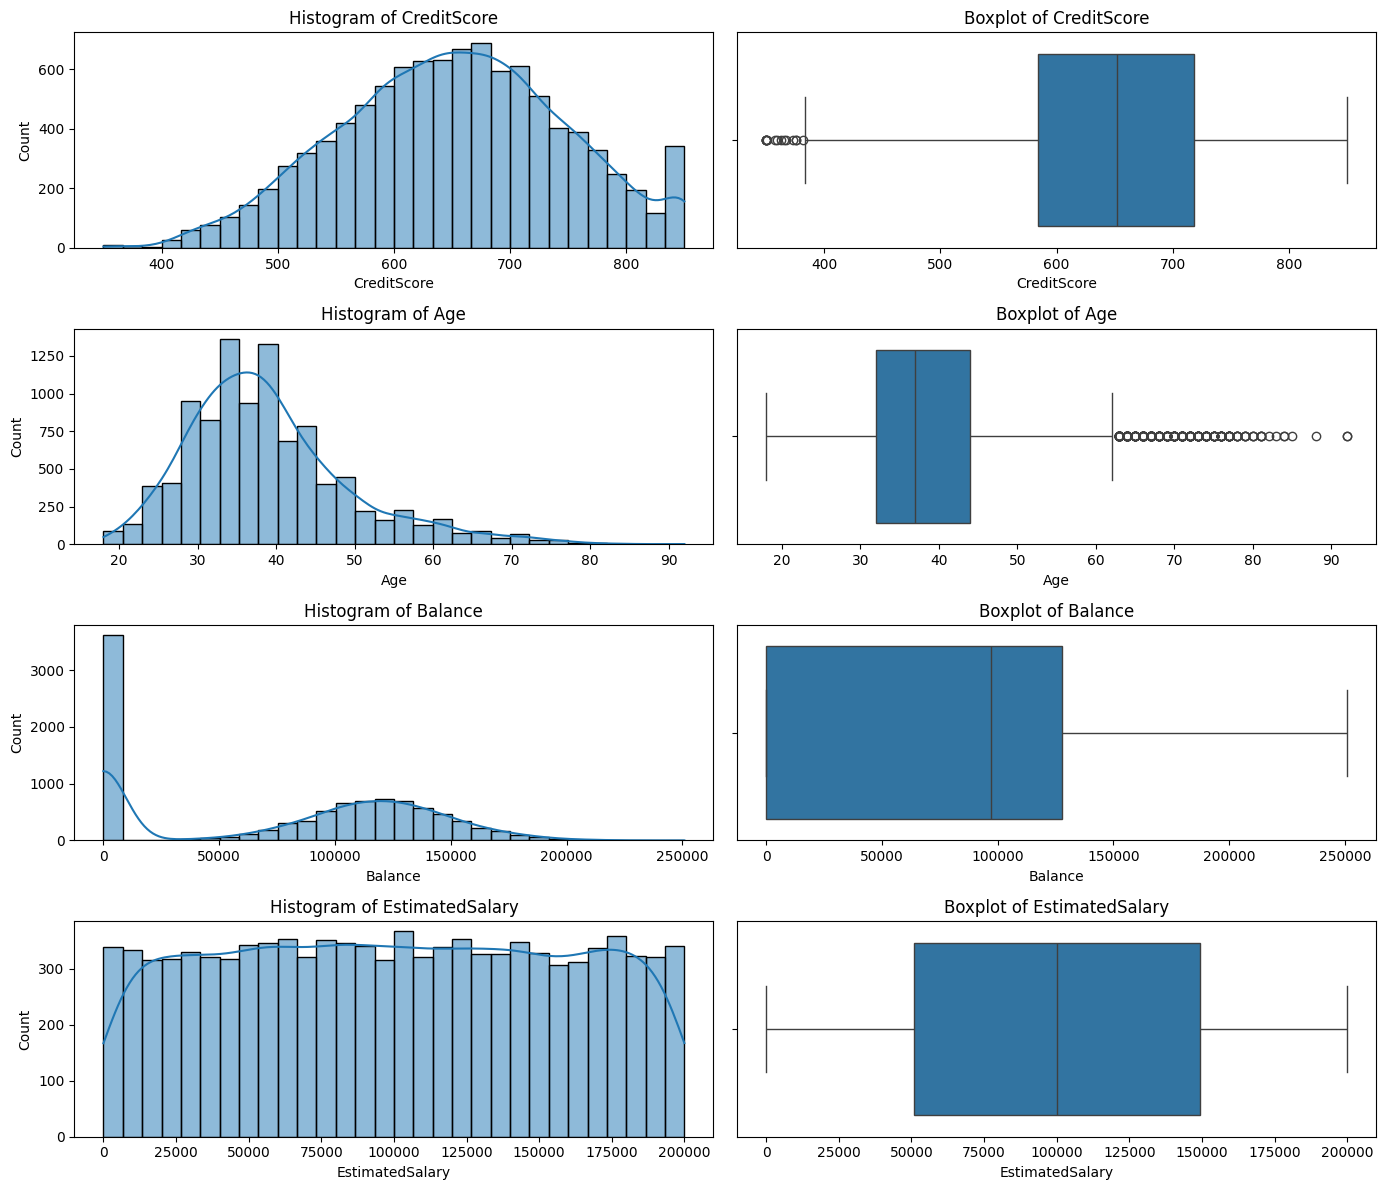

In [ ]:

print('mean for balanced :' + str(df['Balance'].mean()) )
print('mean for Age :' + str(df['Age'].mean()) )
print('mean for CreditScore :' + str(df['CreditScore'].mean()) )
print('mean for EstimatedSalary :' + str(df['EstimatedSalary'].mean()) )

print('median for balanced :' + str(df['Balance'].median()) )
print('median for Age :' + str(df['Age'].median()) )
print('median for CriditScore :' + str(df['CreditScore'].median()) )
print('median for EstimatedSalary :' + str(df['EstimatedSalary'].median()) )

print('mode for balanced :' + str(df['Balance'].mode()) )
print('mode for Age :' + str(df['Age'].mode()) )
print('mode for CreditScore :' + str(df['CreditScore'].mode()) )
print('mode for EstimatedSalary :' + str(df['EstimatedSalary'].mode()) )

print('variance for balanced :' + str(df['Balance'].var() ))
print('variance for Age :' + str(df['Age'].var() ))
print('variance for CriditScore :' + str(df['CreditScore'].var() ))
print('variance for EstimatedSalary :' + str(df['EstimatedSalary'].var() ))

sigma_balanced = pow(df['Balance'].var(),0.5)
print('standard deviation for balanced :'+str(sigma_balanced))
sigma_age = pow(df['Age'].var(),0.5)
print('standard deviation for Age :'+str(sigma_age))
sigma_criditscore = pow(df['CreditScore'].var(),0.5)
print('standard deviation for criditScore : '+str(sigma_criditscore))
sigma_estimatedsalary = pow(df['EstimatedSalary'].var(),0.5)
print('standard deviation for estimatedsalary :' + str(sigma_estimatedsalary))

columns_to_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(14, 12))

for i, col in enumerate(columns_to_plot):
   
    plt.subplot(len(columns_to_plot), 2, 2*i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    
    plt.subplot(len(columns_to_plot), 2, 2*i+2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



### Task 2: Sampling Methods

EstimatedSalary mean for randomsample1 is :101708.86594
Balance mean for randomsample1 is :75175.78465999999
EstimatedSalary mean for randomsample2 is :101708.86594
Balance mean for randomsample2 is :75175.78465999999
EstimatedSalary variance for randomsample1 is :3232128275.0446477
Balance variance for randomsample1 is :3928484998.936598
EstimatedSalary variance for randomsample2 is :3232128275.0446477
Balance variance for randomsample2 is :3928484998.936598
EstimatedSalary mean for stratifiedsample1 is :102288.3209
Balance mean for stratifiedsample1 is :78474.65500999999
EstimatedSalary mean for stratifiedsample2 is :98787.83204
Balance mean for stratifiedsample2 is :76927.1026
EstimatedSalary variance for stratifiedsample1 is :3359960270.118424
Balance variance for stratifiedsample1 is :3951402558.430391
EstimatedSalary variance for stratifiedsample2 is :3354174706.756288
Balance variance for stratifiedsample2 is :3951402558.430391


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11144\1519065366.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratifiedsample1 = df.groupby('Geography', group_keys=False).apply(lambda x: x.sample(frac=0.1))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11144\1519065366.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratifiedsample2 = df.groupby('Geography', group_keys=False).apply(lambda x: x.sa

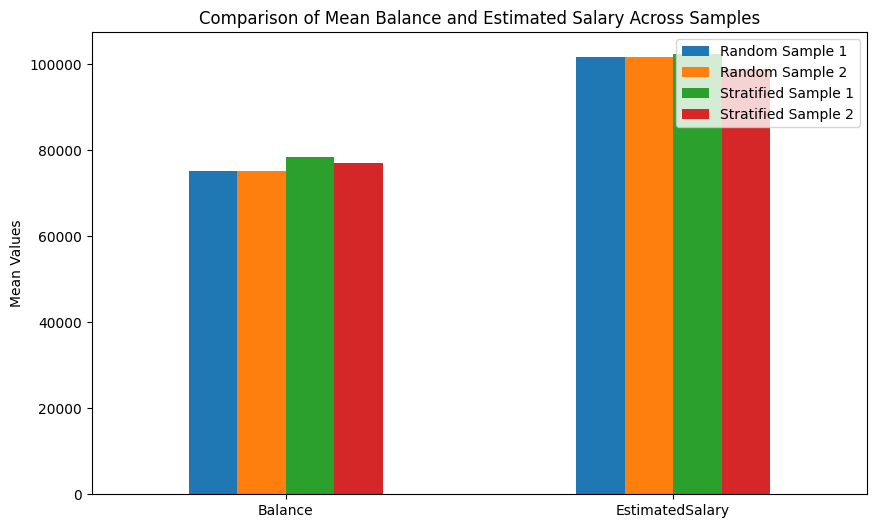

In [ ]:

randomsample1 = df.sample(frac=0.1 , random_state=1)
randomsample2 = df.sample(frac=0.1,random_state=1)

print('EstimatedSalary mean for randomsample1 is :' + str(randomsample1['EstimatedSalary'].mean()))
print('Balance mean for randomsample1 is :' + str(randomsample1['Balance'].mean()))
print('EstimatedSalary mean for randomsample2 is :' + str(randomsample2['EstimatedSalary'].mean()))
print('Balance mean for randomsample2 is :' + str(randomsample2['Balance'].mean()))
print('EstimatedSalary variance for randomsample1 is :' + str(randomsample1['EstimatedSalary'].var()))
print('Balance variance for randomsample1 is :' + str(randomsample1['Balance'].var()))
print('EstimatedSalary variance for randomsample2 is :' + str(randomsample2['EstimatedSalary'].var()))
print('Balance variance for randomsample2 is :' + str(randomsample2['Balance'].var()))

stratifiedsample1 = df.groupby('Geography', group_keys=False).apply(lambda x: x.sample(frac=0.1))
stratifiedsample2 = df.groupby('Geography', group_keys=False).apply(lambda x: x.sample(frac=0.1))


print('EstimatedSalary mean for stratifiedsample1 is :' + str(stratifiedsample1['EstimatedSalary'].mean()))
print('Balance mean for stratifiedsample1 is :' + str(stratifiedsample1['Balance'].mean()))
print('EstimatedSalary mean for stratifiedsample2 is :' + str(stratifiedsample2['EstimatedSalary'].mean()))
print('Balance mean for stratifiedsample2 is :' + str(stratifiedsample2['Balance'].mean()))

print('EstimatedSalary variance for stratifiedsample1 is :' + str(stratifiedsample1['EstimatedSalary'].var()))
print('Balance variance for stratifiedsample1 is :' + str(stratifiedsample1['Balance'].var()))
print('EstimatedSalary variance for stratifiedsample2 is :' + str(stratifiedsample2['EstimatedSalary'].var()))
print('Balance variance for stratifiedsample2 is :' + str(stratifiedsample1['Balance'].var()))

rs1_mean_es =randomsample1['EstimatedSalary'].mean()
rs1_mean_b = randomsample1['Balance'].mean() 
rs2_mean_es = randomsample2['EstimatedSalary'].mean()
rs2_mean_b = randomsample2['Balance'].mean()
ss1_mean_es = stratifiedsample1['EstimatedSalary'].mean()
ss1_mean_b = stratifiedsample1['Balance'].mean()
ss2_mean_es = stratifiedsample2['EstimatedSalary'].mean()
ss2_mean_b = stratifiedsample2['Balance'].mean()


means_df = pd.DataFrame({
    'Random Sample 1': [rs1_mean_b, rs1_mean_es],
    'Random Sample 2': [rs2_mean_b, rs2_mean_es],
    'Stratified Sample 1': [ss1_mean_b, ss1_mean_es],
    'Stratified Sample 2': [ss2_mean_b, ss2_mean_es]
}, index=['Balance', 'EstimatedSalary'])


means_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Mean Balance and Estimated Salary Across Samples')
plt.ylabel('Mean Values')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()



## Part 2: Estimation Methods

### Task 1: Unbiased Estimator

In [66]:
example = df['CreditScore']

sample_of_criditScore = example.sample(random_state=1)
unbaised_estimator_for_mean = sample_of_criditScore.mean()
print('sample mean : ' +str(unbaised_estimator_for_mean))


sample mean : 550.0


### Task 2: Maximum Likelihood Estimation (MLE)

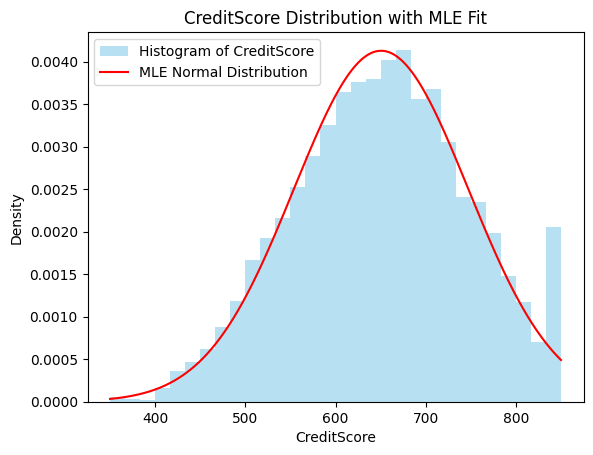

In [ ]:

data = df['CreditScore']
mle_mean = np.mean(data)
mle_variance = np.var(data)
x = np.linspace(min(data),max(data),1000 )
mle_pdf= (1 / np.sqrt(2 * np.pi *mle_variance)) * np.exp(-(x - mle_mean) ** 2 / (2 * mle_variance))

plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', label="Histogram of CreditScore")
plt.plot(x, mle_pdf, 'r-', label="MLE Normal Distribution")
plt.xlabel("CreditScore")
plt.ylabel("Density")
plt.title("CreditScore Distribution with MLE Fit")
plt.legend()
plt.show()


### Task 3: Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)

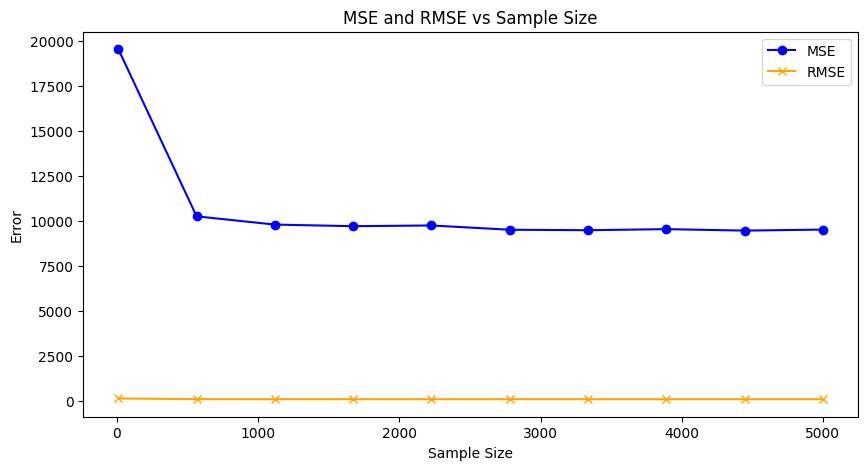

In [ ]:
dataset_sample1 = df['CreditScore'][0:5000]
dataset_sample2 = df['CreditScore'][5000:10000]
mean_sample1 = dataset_sample1.mean()
mse = np.mean((dataset_sample2 - mean_sample1) ** 2)
rmse = np.sqrt(mse)

sample_sizes = np.linspace(10, len(dataset_sample2), 10, dtype=int)
mse_values = []
rmse_values = []

for size in sample_sizes:
    
    sub_sample = dataset_sample1[:size]
    mse2 = np.mean((sub_sample - mean_sample1) ** 2)
    rmse = np.sqrt(mse2)
    mse_values.append(mse2)
    rmse_values.append(rmse)

plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, mse_values, label='MSE', marker='o', color='blue')
plt.plot(sample_sizes, rmse_values, label='RMSE', marker='x', color='orange')
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.title('MSE and RMSE vs Sample Size')
plt.legend()
plt.show()



## Part 3: Statistical Inference and Confidence

### Task 1: Central Limit Theorem (CLT)

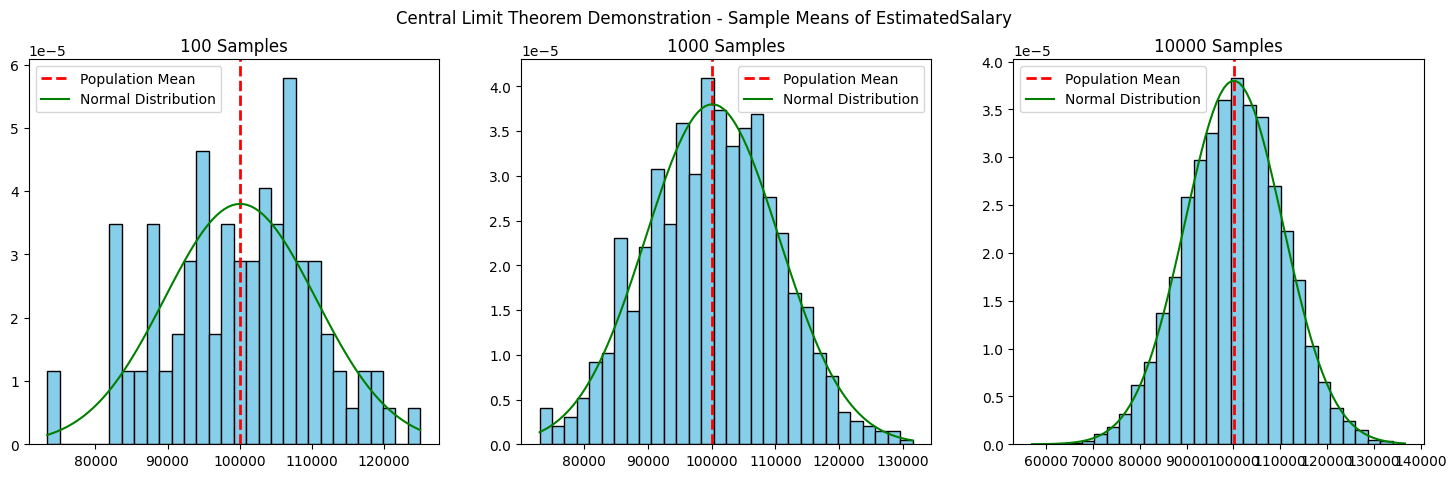

In [ ]:

es_data = df['EstimatedSalary']
sample_sizes = [100, 1000, 10000]
sample_means = []

for s in sample_sizes:
    means = [es_data.sample(30, random_state=i).mean() for i in range(s)]
    sample_means.append(means)

population_mean = es_data.mean()
population_std = es_data.std() / (np.sqrt(30))

plt.figure(figsize=(18, 5))
for i, means in enumerate(sample_means):
    plt.subplot(1, 3, i + 1)
    plt.hist(means, bins=30, color='skyblue', edgecolor='black', density=True)
    plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
    x = np.linspace(min(means), max(means), 100)
    y = (1 / (population_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - population_mean) / population_std)**2)
    plt.plot(x, y, color='green', label='Normal Distribution')
    plt.title(f"{sample_sizes[i]} Samples")
    plt.legend()

plt.suptitle("Central Limit Theorem Demonstration - Sample Means of EstimatedSalary")
plt.show()






### Task 2: Confidence Intervals

95% Confidence Interval for Mean Credit Score: [648.63, 652.42]


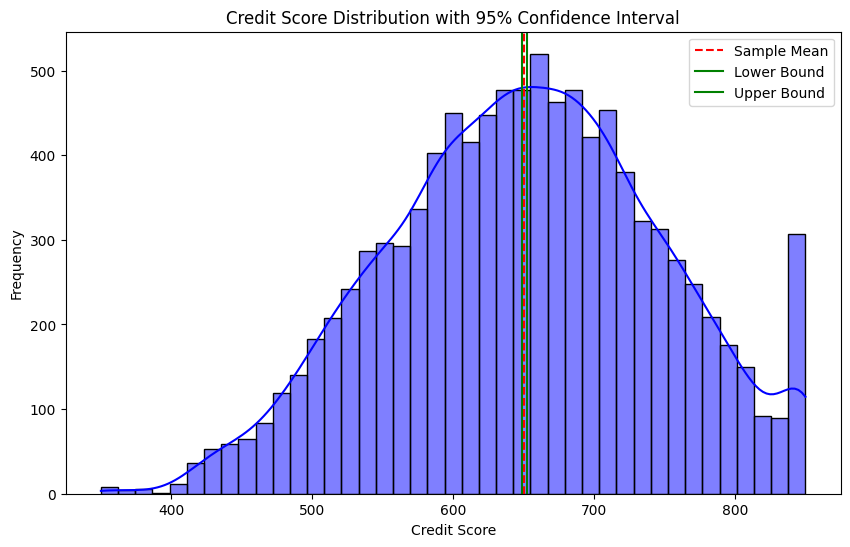

In [ ]:

#z 97.5 ==> 1.96
credit_score_mean = df['CreditScore'].mean()
credit_score_std = df['CreditScore'].std()
n = len(df['CreditScore'])
margin_of_error = 1.96 * credit_score_std / np.sqrt(n)
lower_bound = credit_score_mean - margin_of_error
upper_bound = credit_score_mean + margin_of_error

print(f'95% Confidence Interval for Mean Credit Score: [{lower_bound:.2f}, {upper_bound:.2f}]')

plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True, color='blue')
plt.axvline(credit_score_mean, color='red', linestyle='--', label='Sample Mean')
plt.axvline(lower_bound, color='green', linestyle='-', label='Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='-', label='Upper Bound')
plt.legend()
plt.title('Credit Score Distribution with 95% Confidence Interval')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()